In [88]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb 
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [6]:
df # checking the first 5 and last 5 rows of our dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 907 rows and 27 columns.

In our problem statement we have been asked to predict 2 labels primary_fuel and capacity_mw. When we take a look at the values present in the column primary_fuel we see that there are categorical data in that column so when we consider it as our label it will be termed as a Classification problem!

Similarly, if we take a look at the values present in the column capacity_mw we see that there are continous data in that column so when we consider it as our label it will be termed as a Regression problem!

I will choose to perform the analysis on our entire data set first then will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.

# Exploratory Data Analysis (EDA)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Taking a look at all the 27 column names present in our dataset.

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

Column names that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:
- other_fuel1
- other_fuel2
- other_fuel3
- owner
- wepp_id
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_gwh_2018
- generation_gwh_2019
- generation_data_source
- estimated_generation_gwh

In [11]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_gwh_2018", "generation_gwh_2019", "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.

In [12]:
df.shape

(907, 13)

Now our column numbers have been reduced to 13 from the initial value of 27.

In [13]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


With the help of `nunique` method we were able to check the unique data information present in our dataset columns.

Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 907 rows and does not provide any insight so it can be deleted.

Similarly, the column "year_of_capacity_data" also has 1 single value present in it's rows and has missing data as well so it will not provide any useful information and can be deleted.

Also I see that columns "name" and "gppd_idnr" have all unique data in all the 907 rows of the dataset and being a unique identifier would help building a machine learning model either and can be deleted too.

Finally, I see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

Jotting down the names of columns that we will need to remove are:
- country
- country_long
- year_of_capacity_data
- name
- gppd_idnr
- url

In [14]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

We have successfully dropped 6 more columns that were not providing any useful insight for our predition models.

In [15]:
print(df.shape)
df.head()

(907, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [16]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

Okay so we still have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of mean and mode will become easier.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


Using the `info` method we can see that out of the 7 columns present in our filtered dataset we have 4 numerical data valued columns and 3 object data valued columns.

In [18]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


We have successfully bifurcated the object datatype column names and float data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process only on numerical continous columns.

In [19]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.

In [20]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Awesome we have now successfully taken care of all the missing data present in our dataset.

In [21]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Acc Acc ltd                                                      4
Reliance Power Ltd                                               4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Hindustan Zinc ltd                                               3
Shri Ssk ltd                                                     3
PEDA                   

In the above cell I am taking a look at the object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.

# Visualization

In [23]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

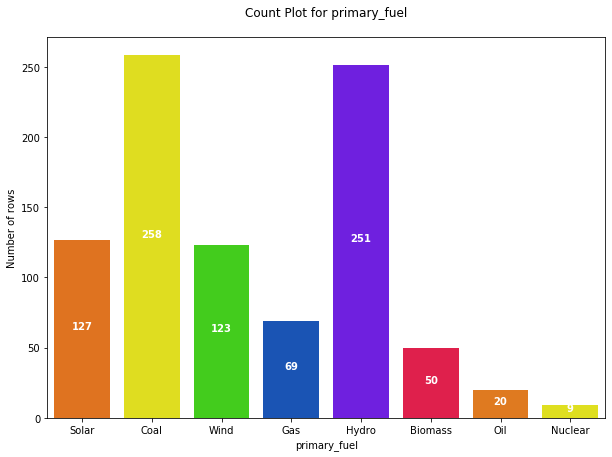

In [24]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

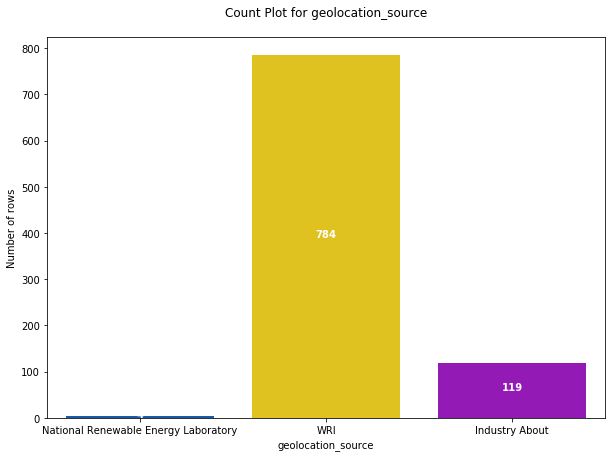

In [25]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

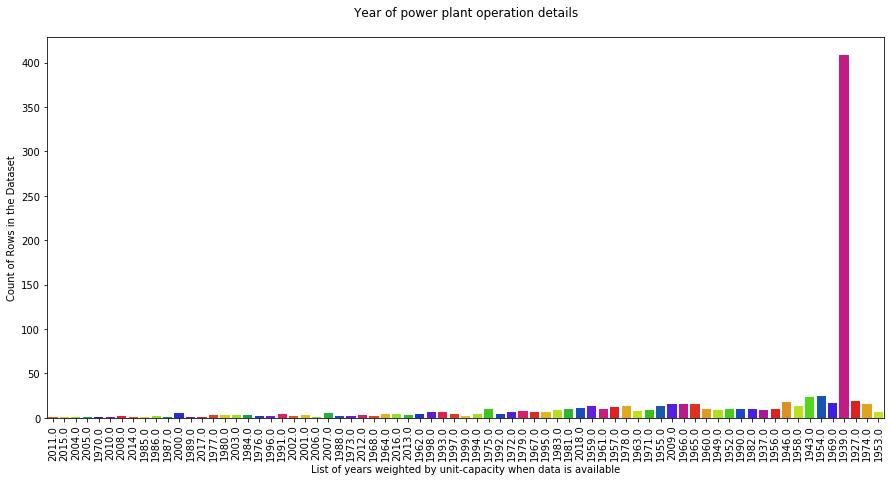

In [26]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode where in the year 1939 covered the most rows in our dataset compared to all the other years.

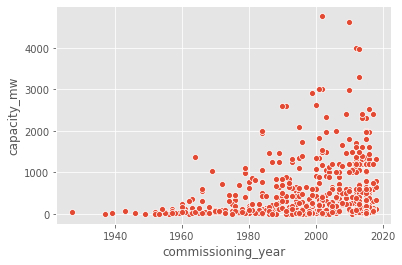

In [27]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

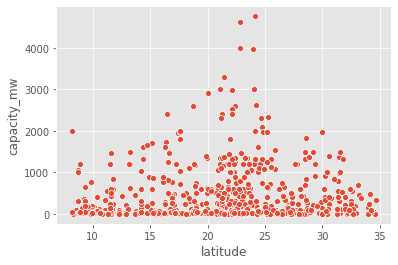

In [28]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

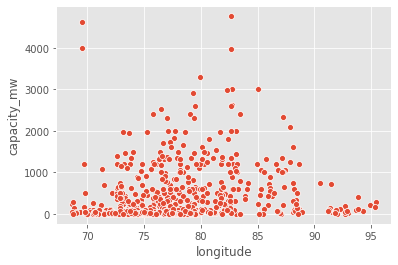

In [29]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

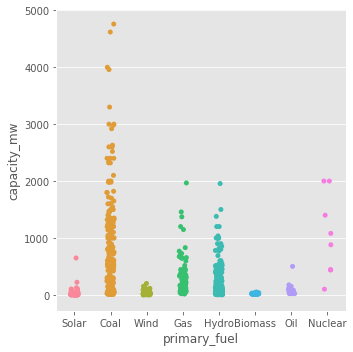

In [30]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

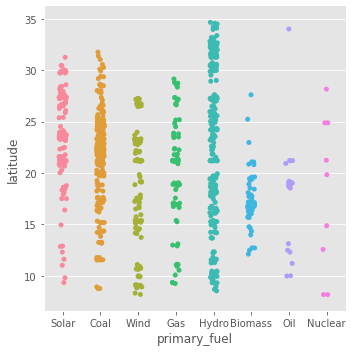

In [31]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

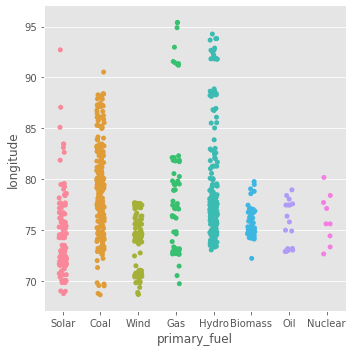

In [32]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In the above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

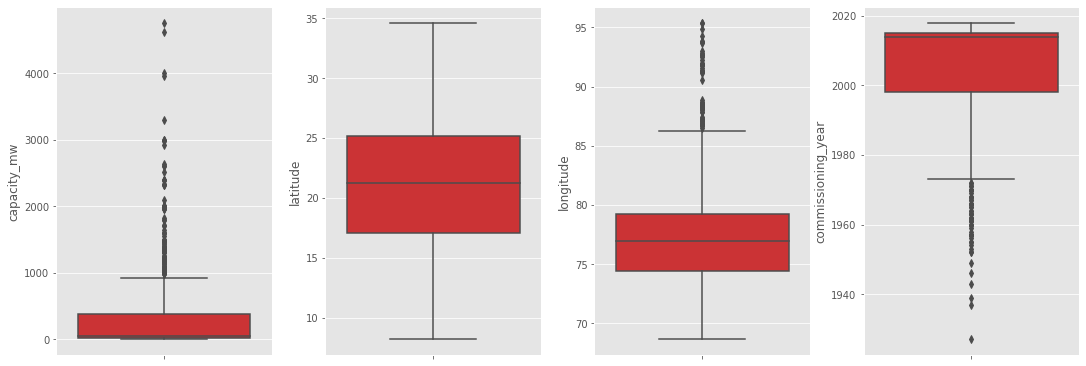

In [33]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

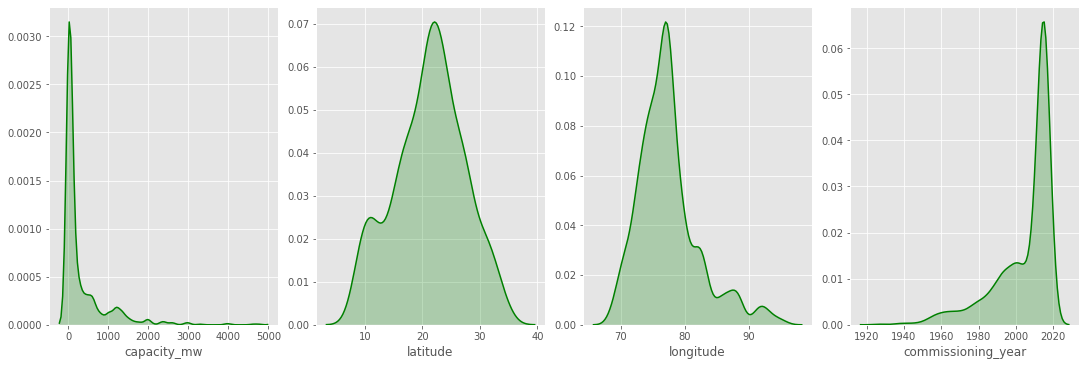

In [34]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.

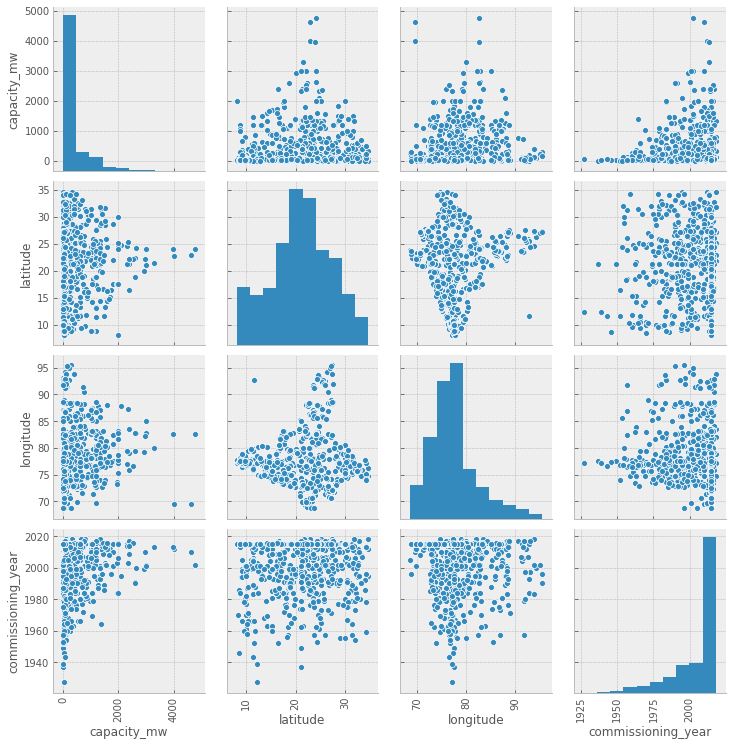

In [35]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns.

# Encoding all the object datatype columns

In [36]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.

In [37]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. I could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.

# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

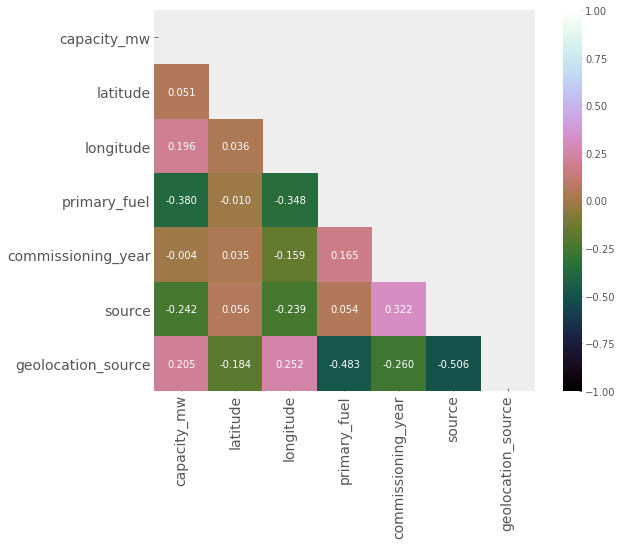

In [38]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels

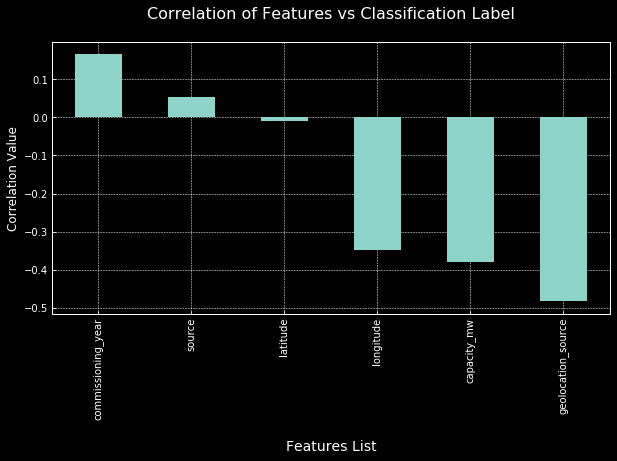

In [39]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

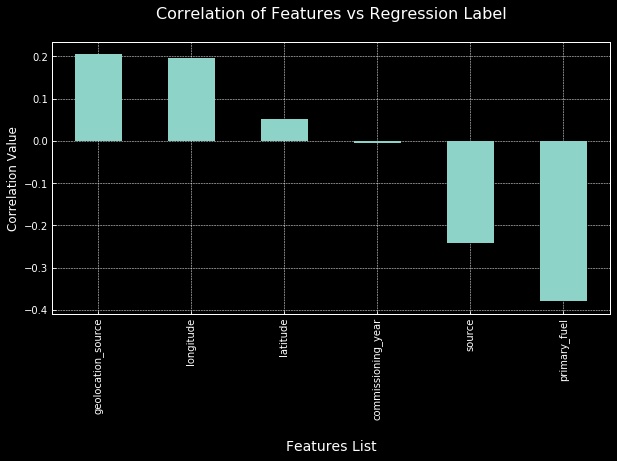

In [40]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

# Using Z Score to remove outliers

In [41]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


I have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.

In [42]:
df.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

The `skew` method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

# Using Log Transform to fix skewness

In [43]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [44]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.

# Resolving the class imbalance issue in our label column

In [45]:
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [46]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

`SMOTE` is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [47]:
Y.value_counts()

7    234
6    234
5    234
4    234
3    234
2    234
1    234
0    234
Name: primary_fuel, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

# Feature Scaling

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.745664,1.464998,-0.855549,0.406928,1.340358,-1.188715
1,0.160330,0.860667,-0.461453,0.732512,2.773935,0.368779
2,-0.353613,0.354494,-2.010034,0.732512,-0.600485,0.368779
3,0.341406,0.702388,3.856987,-0.162844,-0.578430,0.368779
4,1.814626,0.364485,1.657235,0.732512,-0.578430,0.368779


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Classification Models

In [49]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 74.35897435897436 on Random State 118


# Machine Learning Model for Classification with Evaluation Metrics

In [50]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [51]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84        69
           1       0.51      0.57      0.54        47
           2       0.33      0.25      0.29        36
           3       0.66      0.51      0.57        77
           4       0.68      0.86      0.76        64
           5       0.61      0.56      0.58        55
           6       1.00      1.00      1.00        57
           7       0.81      0.97      0.88        63

    accuracy                           0.72       468
   macro avg       0.68      0.69      0.68       468
weighted avg       0.71      0.72      0.71       468

Accuracy Score: 71.58119658119658
Cross Validation Score: 68.2164705882353

Accuracy Score - Cross Validation Score is 3.364725992961283


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [52]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        69
           1       0.68      0.68      0.68        47
           2       0.56      0.53      0.54        36
           3       0.95      0.70      0.81        77
           4       0.74      1.00      0.85        64
           5       0.84      0.76      0.80        55
           6       1.00      1.00      1.00        57
           7       0.82      0.98      0.89        63

    accuracy                           0.83       468
   macro avg       0.82      0.81      0.81       468
weighted avg       0.84      0.83      0.83       468

Accuracy Score: 83.11965811965813
Cross Validation Score: 80.07543672014262

Accuracy Score - Cross Validation Score is 3.044221399515507


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [53]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        69
           1       0.61      0.60      0.60        47
           2       0.57      0.72      0.63        36
           3       0.90      0.74      0.81        77
           4       0.87      0.94      0.90        64
           5       0.85      0.91      0.88        55
           6       0.98      1.00      0.99        57
           7       1.00      1.00      1.00        63

    accuracy                           0.87       468
   macro avg       0.85      0.85      0.85       468
weighted avg       0.87      0.87      0.87       468

Accuracy Score: 86.53846153846155
Cross Validation Score: 85.41675579322637

Accuracy Score - Cross Validation Score is 1.1217057452351753


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [54]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.78      0.74      0.76        47
           2       0.63      0.75      0.68        36
           3       0.92      0.84      0.88        77
           4       0.88      0.98      0.93        64
           5       0.96      0.89      0.92        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.91       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.91      0.91      0.91       468

Accuracy Score: 90.5982905982906
Cross Validation Score: 90.70445632798574

Accuracy Score - Cross Validation Score is -0.10616572969513527


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [55]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        69
           1       0.68      0.53      0.60        47
           2       0.52      0.69      0.60        36
           3       0.91      0.56      0.69        77
           4       0.74      0.94      0.83        64
           5       0.81      0.87      0.84        55
           6       1.00      1.00      1.00        57
           7       0.79      0.97      0.87        63

    accuracy                           0.81       468
   macro avg       0.80      0.80      0.79       468
weighted avg       0.82      0.81      0.80       468

Accuracy Score: 80.76923076923077
Cross Validation Score: 80.34096256684492

Accuracy Score - Cross Validation Score is 0.4282682023858513


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [56]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.84      0.77      0.80        47
           2       0.73      0.75      0.74        36
           3       0.93      0.86      0.89        77
           4       0.88      1.00      0.93        64
           5       0.96      0.95      0.95        55
           6       1.00      1.00      1.00        57
           7       0.97      1.00      0.98        63

    accuracy                           0.92       468
   macro avg       0.91      0.91      0.91       468
weighted avg       0.92      0.92      0.92       468

Accuracy Score: 92.3076923076923
Cross Validation Score: 91.66673796791444

Accuracy Score - Cross Validation Score is 0.6409543397778634


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best Classification ML Model

In [57]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [58]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best classification model.

In [59]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [60]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_jobs': 2,
 'random_state': 45}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [61]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.3076923076923


I have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.

# AUC ROC Curve for multi class label

In [68]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.994688 (macro),
0.994802 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994763 (macro),
0.994948 (weighted by prevalence)


I have generated the ROC Curve for my final classification model and it shows the One-vs-One ROC AUC scores and One-vs-Rest ROC AUC scores.

# Confusion Matrix

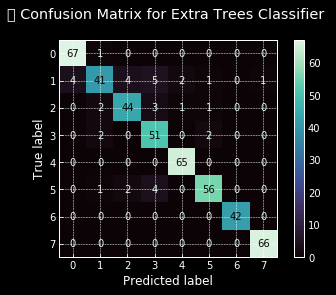

In [66]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the best Classification ML model

In [69]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_E04.pkl']

Finally I am saving my best classification model using the joblib library.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [70]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

I have separated the dataset into features and regression label where X represents all the feature columns and Y represents the regression target label column.

# Feature Scaling

In [71]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.578700,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,3.125148,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.514953,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.491161,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.491161,0.400848


I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

# Finding the best random state for building Regression Models

In [76]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5342507568882502 on Random State 672


In [77]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=672)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [80]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.269330371115999
R2 Score is: 53.42507568882502
Cross Validation Score: 41.93834317486533
R2 Score - Cross Validation Score is 11.486732513959687


Created the Linear Regression model and checked it's evaluation metrics.

In [86]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.2709878842200337
R2 Score is: 53.303359620717686
Cross Validation Score: 41.964875678989415
R2 Score - Cross Validation Score is 11.33848394172827


Created the Ridge Regression model and checked it's evaluation metrics.

In [87]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1.3992848452931013
R2 Score is: 43.40017661127411
Cross Validation Score: 37.38354322322448
R2 Score - Cross Validation Score is 6.016633388049634


Created the Lasso Regression model and checked it's evaluation metrics.

In [89]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.2043219973704464
R2 Score is: 58.073553724422254
Cross Validation Score: 48.73928224288554
R2 Score - Cross Validation Score is 9.334271481536717


Created the Support Vector Regression model and checked it's evaluation metrics.

In [90]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.6295305392718176
R2 Score is: 23.24126251271321
Cross Validation Score: 18.60204042745478
R2 Score - Cross Validation Score is 4.639222085258428


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [92]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.30215487406004
R2 Score is: 50.98510274874929
Cross Validation Score: 46.16514081531088
R2 Score - Cross Validation Score is 4.819961933438414


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [93]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2957156533460854
R2 Score is: 51.46866637887884
Cross Validation Score: 45.34592615560961
R2 Score - Cross Validation Score is 6.122740223269226


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [94]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.468494592636417
R2 Score is: 37.66276741553759
Cross Validation Score: 5.275091129761476
R2 Score - Cross Validation Score is 32.38767628577611


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [95]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1889883145151343
R2 Score is: 59.13438985655512
Cross Validation Score: 54.91379554379362
R2 Score - Cross Validation Score is 4.220594312761499


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [96]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.1259286970681899
R2 Score is: 63.35416755946224
Cross Validation Score: 63.04145447744849
R2 Score - Cross Validation Score is 0.3127130820137509


Created the Extra Trees Regressor model and checked it's evaluation metrics.

In [98]:
import xgboost as xg

In [100]:
# XGB Regressor

model=xg.XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1.2112175542120287
R2 Score is: 57.59206479006303
Cross Validation Score: 56.768431000290434
R2 Score - Cross Validation Score is 0.8236337897725932


Created the XGB Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning on the best Regression ML Model

In [101]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage. I chose Extra Trees Regressor model becuase I feel among all the other regression models it was able to give me a better R2 score and a decent cross validation score for the same.

In [102]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best regression model.

In [103]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [104]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': 1,
 'random_state': 42}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [105]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 68.09997386756837


I have successfully incorporated the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.

# Saving the best Regression ML model

In [106]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']

Finally, I am saving my best regression model using the joblib library.